<a href="https://colab.research.google.com/github/surf-guy/DSE200/blob/main/HW/MiniProjectStarter_Le.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install numpy pandas matplotlib seaborn scipy scikit-learn kagglehub

In [2]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
# Download latest version
path = kagglehub.dataset_download("ihormuliar/starbucks-customer-data")

print("Path to dataset files:", path)

# portfolio.csv
portfolio_df = pd.read_csv(path + "/portfolio.csv")

# profile.csv
profile_df = pd.read_csv(path + "/profile.csv")

# transcript.csv
transcript_df = pd.read_csv(path + "/transcript.csv")

100%|██████████| 7.38M/7.38M [00:00<00:00, 132MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ihormuliar/starbucks-customer-data/versions/1


In [4]:
portfolio_df.head()

,Unnamed: 0,reward,channels,difficulty,duration,offer_type,id
0,0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [5]:
 profile_df.head()

,Unnamed: 0,gender,age,id,became_member_on,income
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [6]:
transcript_df.head()

,Unnamed: 0,person,event,value,time
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


**Section 1:  EDA**


In [7]:
#Get stats on profile
print(profile_df.describe())
print(profile_df.info())

#Any NaN at all
print(profile_df.isna().any())

#Profile_df:  there are 17000 customners but there are NaN values in 'gender','income'

         Unnamed: 0           age  became_member_on         income
count  17000.000000  17000.000000      1.700000e+04   14825.000000
mean    8499.500000     62.531412      2.016703e+07   65404.991568
std     4907.621624     26.738580      1.167750e+04   21598.299410
min        0.000000     18.000000      2.013073e+07   30000.000000
25%     4249.750000     45.000000      2.016053e+07   49000.000000
50%     8499.500000     58.000000      2.017080e+07   64000.000000
75%    12749.250000     73.000000      2.017123e+07   80000.000000
max    16999.000000    118.000000      2.018073e+07  120000.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        17000 non-null  int64  
 1   gender            14825 non-null  object 
 2   age               17000 non-null  int64  
 3   id                17000 non-null  object 
 4   be

In [8]:
#get stats on portfolio_df
print(portfolio_df.describe())
print(portfolio_df.info())

#Any NaN at all
print(portfolio_df.isna().any())

#Portfolio_df:  there are 10 offer types and there are no NaN values

       Unnamed: 0     reward  difficulty   duration
count    10.00000  10.000000   10.000000  10.000000
mean      4.50000   4.200000    7.700000   6.500000
std       3.02765   3.583915    5.831905   2.321398
min       0.00000   0.000000    0.000000   3.000000
25%       2.25000   2.000000    5.000000   5.000000
50%       4.50000   4.000000    8.500000   7.000000
75%       6.75000   5.000000   10.000000   7.000000
max       9.00000  10.000000   20.000000  10.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10 non-null     int64 
 1   reward      10 non-null     int64 
 2   channels    10 non-null     object
 3   difficulty  10 non-null     int64 
 4   duration    10 non-null     int64 
 5   offer_type  10 non-null     object
 6   id          10 non-null     object
dtypes: int64(4), object(3)
memory usage: 692.0+ bytes
None
Unnamed: 0 

In [9]:
#get stats on transcript_df
print(transcript_df.describe())
print(transcript_df.info())

#Any NaN at all
print(transcript_df.isna().any())

#Transcript_df:  306534 transactions and there are no NaN values

          Unnamed: 0           time
count  306534.000000  306534.000000
mean   153266.500000     366.382940
std     88488.888045     200.326314
min         0.000000       0.000000
25%     76633.250000     186.000000
50%    153266.500000     408.000000
75%    229899.750000     528.000000
max    306533.000000     714.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  306534 non-null  int64 
 1   person      306534 non-null  object
 2   event       306534 non-null  object
 3   value       306534 non-null  object
 4   time        306534 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.7+ MB
None
Unnamed: 0    False
person        False
event         False
value         False
time          False
dtype: bool


**Section 2:  Data Preprocessing**





In [10]:
#Clean up profile_df

#remove rows with NaN in 'gender' and 'income'
profile_df_clean = profile_df.dropna(subset=['gender', 'income'])
print("Before cleanup: ",len(profile_df))
print("After cleanup: ",len(profile_df_clean))


Before cleanup:  17000
After cleanup:  14825


In [11]:
#Convert become_member_on to datetime
profile_df_clean = profile_df_clean.copy()
profile_df_clean['became_member_on'] = pd.to_datetime(profile_df_clean['became_member_on'], format='%Y%m%d')


In [12]:
import ast
#format transaction value to 2 decimal places
# Make a copy to avoid SettingWithCopyWarning
transcript_df_clean = transcript_df.copy()

# Only modify rows where event == 'transaction'
mask = transcript_df_clean['event'] == 'transaction'

transcript_df_clean.loc[mask, 'value'] = (
    transcript_df_clean.loc[mask, 'value'].apply(lambda s: float(ast.literal_eval(s)['amount'])).round(2)
)

transcript_df_clean[transcript_df_clean['event'] == 'transaction'].head()

,Unnamed: 0,person,event,value,time
12654,12654,02c083884c7d45b39cc68e1314fec56c,transaction,0.83,0
12657,12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,34.56,0
12659,12659,54890f68699049c2a04d415abc25e717,transaction,13.23,0
12670,12670,b2f1cd155b864803ad8334cdf13c4bd2,transaction,19.51,0
12671,12671,fe97aa22dd3e48c8b143116a8403dd52,transaction,18.97,0


In [13]:
#For event: 'transaction', return only the value {'amount': 1.50}
# Extract only the 'amount' for transaction rows
mask = transcript_df_clean['event'] == 'transaction'
transcript_df_clean.loc[mask, 'value'] = (
    transcript_df_clean.loc[mask, 'value']
    .apply(lambda x: x.get('amount') if isinstance(x, dict) else x)
)


In [14]:
#transcript_df: reformat the key:value {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'} into just the string value '9b98b8c7a33c4b65b9aebfe6a799e6d9'

#For event: 'offer recieved' and 'offer viewed'
transcript_df_clean = transcript_df.copy()
def parse_on_colon(s):
    s = s.strip("{} ").replace('"', "'")   # remove braces and normalize quotes
    if "offer id" in s:
        # split on "offer_id':" to directly get its value
        parts = s.split("offer id':", 1)
        value = parts[1].split(",", 1)[0].strip().strip("'\" ")
        return value
    elif ":" in s:
        # fallback: original behavior
        parts = s.split(":", 1)
        value = parts[1].split(",", 1)[0].strip().strip("'\" ")
        return value
    else:
        return s

#For event: 'offer completed'
transcript_df_clean["value"] = transcript_df_clean["value"].apply(parse_on_colon)



In [15]:
#group rows by person and value in order to view how far down the promotion funnel they got ie(offer recived, offer viewed, offer completed)
transcript_df_sorted=transcript_df_clean.sort_values(by=['person', 'value'])

#Remove event: transaction
transcript_df_sorted = transcript_df_sorted[transcript_df_sorted['event'] != 'transaction']
transcript_df_sorted

,Unnamed: 0,person,event,value,time
247879,247879,0009655768c64bdeb2e877511632db8f,offer received,2906b810c7d4411798c6938adc9daaa5,576
258884,258884,0009655768c64bdeb2e877511632db8f,offer completed,2906b810c7d4411798c6938adc9daaa5,576
113605,113605,0009655768c64bdeb2e877511632db8f,offer received,3f207df678b143eea3cee63160fa8bed,336
139992,139992,0009655768c64bdeb2e877511632db8f,offer viewed,3f207df678b143eea3cee63160fa8bed,372
55972,55972,0009655768c64bdeb2e877511632db8f,offer received,5a8bc65990b245e5a138643cd4eb9837,168
...,...,...,...,...,...
214717,214717,ffff82501cea40309d5fdd7edcca4a07,offer completed,9b98b8c7a33c4b65b9aebfe6a799e6d9,504
230690,230690,ffff82501cea40309d5fdd7edcca4a07,offer viewed,9b98b8c7a33c4b65b9aebfe6a799e6d9,534
1393,1393,ffff82501cea40309d5fdd7edcca4a07,offer received,fafdcd668e3743c1bb461111dcafc2a4,0
15836,15836,ffff82501cea40309d5fdd7edcca4a07,offer viewed,fafdcd668e3743c1bb461111dcafc2a4,6


In [16]:
print("There are",transcript_df_sorted['person'].nunique(), "unique customers in the dataset")
print("There are",len(transcript_df_sorted),"records in the dataset")

There are 16994 unique customers in the dataset
There are 167581 records in the dataset


People can complete some offers and not other offers.  THerefore, cannot split people into 'completed' and 'not completed'.

Need to create a Person-Campaign dataframe


In [27]:
person_campaign_df = transcript_df_sorted.copy()
# Step 1: Create a flag column for each event
person_campaign_df['flag'] = 1

# Step 2: Pivot person/campaign vs event types
person_campaign_df= person_campaign_df.pivot_table(
    index=['person', 'value'],
    columns='event',
    values='flag',
    aggfunc='max',               # if event appears, mark as 1
    fill_value=0                 # fill missing with 0
).reset_index()


person_campaign_df.head()

event,person,value,offer completed,offer received,offer viewed
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,1,1,0
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,0,1,1
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,0,1,1
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,1,1,1


What person or campaign attributes increase likelihood of completion?

Approach:  Supervised classification
Target variable = 'offer completed' (0 or 1)
Features: person attributes + campaign attributes
Models:  Logistic Regression or Random Forest

In [31]:
#Merge person and campaign attributes
df_model = person_campaign_df.merge(profile_df_clean, left_on='person', right_on='id', how='left')
df_model = df_model.merge(portfolio_df, left_on='value', right_on='id', how='left')

# Drop redundant id columns
df_model.drop(columns=['id_x', 'id_y', 'Unnamed: 0_x', 'Unnamed: 0_y'], inplace=True)

df_model.head()

,person,value,offer completed,offer received,offer viewed,gender,age,became_member_on,income,reward,channels,difficulty,duration,offer_type
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,1,1,0,M,33.0,2017-04-21,72000.0,2,"['web', 'email', 'mobile']",10,7,discount
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,0,1,1,M,33.0,2017-04-21,72000.0,0,"['web', 'email', 'mobile']",0,4,informational
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,0,1,1,M,33.0,2017-04-21,72000.0,0,"['email', 'mobile', 'social']",0,3,informational
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,M,33.0,2017-04-21,72000.0,5,"['web', 'email', 'mobile', 'social']",5,5,bogo
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,M,33.0,2017-04-21,72000.0,2,"['web', 'email', 'mobile', 'social']",10,10,discount


In [46]:
#Select features and target
X = df_model.drop(columns=['offer completed', 'person', 'value'])
y = df_model['offer completed']

#Convert categorical to numeric
X = pd.get_dummies(X, columns=['gender', 'offer_type'])

# Convert 'became_member_on' to numerical (days since the earliest date)
X['became_member_on'] = (X['became_member_on'] - X['became_member_on'].min()).dt.days

# Count the number of channels for each offer
X['channels_count'] = X['channels'].str.strip('[]').str.replace("'", "").str.split(', ').apply(len)
X = X.drop(columns=['channels'])


In [47]:
#Train classification model (Ramdom Forest)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))


              precision    recall  f1-score   support

           0       0.80      0.80      0.80     10233
           1       0.77      0.77      0.77      8754

    accuracy                           0.79     18987
   macro avg       0.78      0.79      0.79     18987
weighted avg       0.79      0.79      0.79     18987

AUC: 0.8790073958958684


became_member_on            0.299711
income                      0.197582
age                         0.183627
reward                      0.065967
difficulty                  0.059697
duration                    0.058404
offer_type_informational    0.055046
offer viewed                0.023649
channels_count              0.015341
gender_F                    0.015080
offer_type_discount         0.009763
gender_M                    0.009686
offer_type_bogo             0.005153
gender_O                    0.001293
offer received              0.000000
dtype: float64


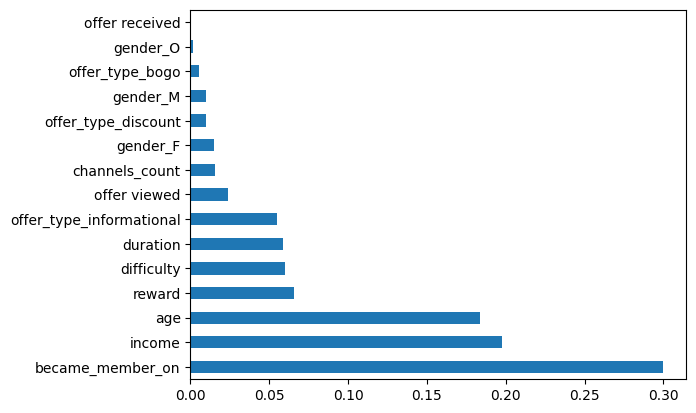

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importance.head(20))

feature_importance.head(20).plot(kind='barh')
plt.show()


The top three predictors for offer completion is:

Person
1.   Age
2.   Income
3.   Days of membership

Campaign:
1.   Informational offer type
2.   Duration
3.   Difficulty
4.   Reward



